## **Implementing simple Linear Regression**

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
# For visualizations 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [57]:
# For model accuracy evaluation
from sklearn.metrics import r2_score

## *Loading the dataset and creating dataframe*

In [4]:
df = pd.read_csv('Datasets\car data.csv')

In [5]:
print('Cars dataset head : \n')
df.head(5)

Cars dataset head : 



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
print(f'Dataframe shape : {df.shape[0]} x {df.shape[1]}   (rows x cols)')

Dataframe shape : 301 x 9   (rows x cols)


In [11]:
print('Statistical analyis of the data : \n')
df.describe()

Statistical analyis of the data : 



,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
print('Checking for null values : \n')
df.isna().sum()

Checking for null values : 



Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
print('Dataframe columns : \n')
df.columns

Dataframe columns : 



Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [23]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [24]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## *Handling of categorical data in the dataframe*

In [25]:
from sklearn.preprocessing import LabelEncoder 


In [34]:
Fuel = pd.DataFrame({'Fuel Type' : ['Petrol', 'Diesel', 'CNG']})
Seller = pd.DataFrame({'Seller Type' : ['Dealer', 'Individual']})
Transmission = pd.DataFrame({'Transmission' : ['Manual', 'Automatic']})

print('Pre-Encoding Categorical data')


Pre-Encoding Categorical data


In [35]:
Fuel

,Fuel Type
0,Petrol
1,Diesel
2,CNG


In [36]:
Seller

,Seller Type
0,Dealer
1,Individual


In [37]:
Transmission

,Transmission
0,Manual
1,Automatic


## *Transforming categorical data <---> numeric data*

In [39]:
# creating an instance of encoder
L = LabelEncoder()

df['Fuel_Type'] = L.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = L.fit_transform(df['Seller_Type'])
df['Transmission'] = L.fit_transform(df['Transmission'])

In [40]:
# Now we have assigned an integer representation for different categories of different columns
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## *Preparing training & test sets + Building the Regression Model*

In [41]:
# Drop the features that are irrelevant in prediction of the output(dependent variable) & the output itself (Selling price)
x = df.drop(['Car_Name', 'Selling_Price'], axis = 1)

# Dependent feature to be predicted
y = df['Selling_Price']

In [52]:
# Creating train-test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 30)
print('Training data shape : \n')
print(f'x_train  : {x_train.shape[0]} x {x_train.shape[1]}')
print(f'y_train  : {y_train.shape}')

print('Validation data shape : \n')
print(f'x_test : {x_test.shape[0]} x {x_test.shape[1]}')
print(f'y_test : {y_test.shape}')

Training data shape : 

x_train  : 255 x 7
y_train  : (255,)
Validation data shape : 

x_test : 46 x 7
y_test : (46,)


In [53]:
model = LinearRegression()

# training the model 
model.fit(x_train, y_train)

LinearRegression()

In [60]:
training_predictions = model.predict(x_train)
error_score = r2_score(y_train, training_predictions)
print(f'Error score : {error_score}')
print(f'Hence, the model explains approx {round(error_score * 100)} % of the variability in data')

Error score : 0.8996321673999456
Hence, the model explains approx 90 % of the variability in data


## *Visualizations*

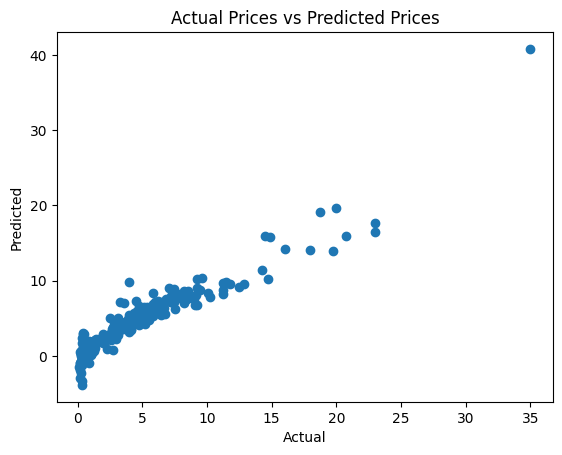

In [63]:
# Scatter plot 
plt.scatter(y_train, training_predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [65]:
test_prediction = model.predict(x_test)

error_score_test = r2_score(y_test, test_prediction)
print(f'Error score : {error_score_test}') 
print(f'Hence, the model accuracy is approx {round(error_score_test * 100)} % on test data (unseen data)')

Error score : 0.8018500606613044
Hence, the model accuracy is approx 80 % on test data (unseen data)


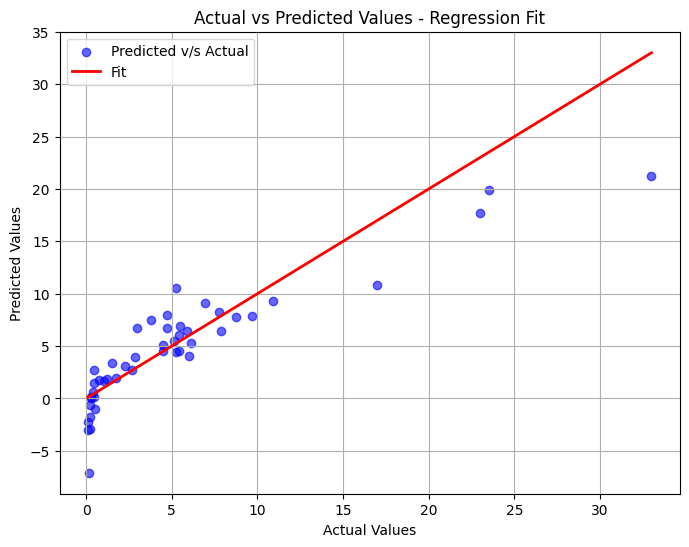

In [66]:
# Plotting the best-fit Regression line
plt.figure(figsize = (8, 6))
plt.scatter(y_test, test_prediction, color = 'blue', alpha = 0.6, label = 'Predicted v/s Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', lw = 2, label = 'Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Regression Fit')
plt.legend()
plt.grid(True)
plt.show()